In [4]:
########################################
#             PATH SETUP
########################################

import sys
import os
sys.path.insert(0, os.path.abspath("."))

########################################
#             LIBRERIES SETUP
########################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
########################################
#             SIMULATION LIBRARIES
########################################
from lemer.rngs import MultiStreamRNG
from lemer.rvms import *

from simulator.simulation import Simulation

In [5]:
#Load config
cfg_1 = "config_obj1.json"

all_sim = []
all_sim_per_node = []
cfg_1_json: dict = json.load(open(cfg_1))
cfg_1_json['max_events'] = 1000000


simulation 1/15 with arrival rate 0.5 completed. 15.751 seconds
simulation 2/15 with arrival rate 0.55 completed. 15.125 seconds
simulation 3/15 with arrival rate 0.6 completed. 15.398 seconds
simulation 4/15 with arrival rate 0.65 completed. 15.514 seconds
simulation 5/15 with arrival rate 0.7 completed. 15.611 seconds
simulation 6/15 with arrival rate 0.75 completed. 15.921 seconds
simulation 7/15 with arrival rate 0.8 completed. 17.112 seconds
simulation 8/15 with arrival rate 0.85 completed. 18.379 seconds
simulation 9/15 with arrival rate 0.9 completed. 18.597 seconds
simulation 10/15 with arrival rate 0.95 completed. 18.578 seconds
simulation 11/15 with arrival rate 1.0 completed. 16.900 seconds
simulation 12/15 with arrival rate 1.05 completed. 17.170 seconds
simulation 13/15 with arrival rate 1.1 completed. 17.692 seconds
simulation 14/15 with arrival rate 1.15 completed. 18.251 seconds
simulation 15/15 with arrival rate 1.2 completed. 19.794 seconds


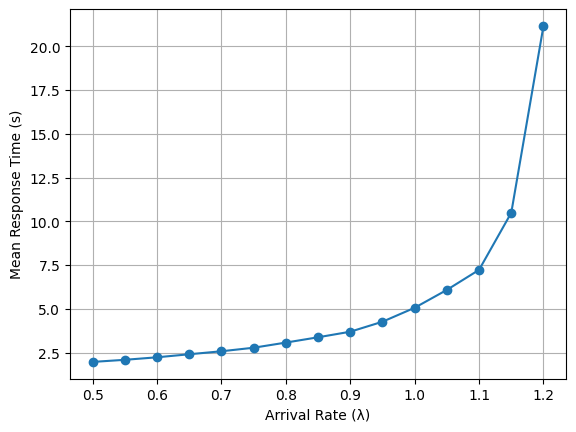

In [6]:
ovs = {
    "arrival_rate": [],
    "mean_response_time": []
}
pns = {
    "Server A" : {
        "arrival_rate": [],
        "mean_response_time": []
        },
    "Server B": {
        "arrival_rate": [],
        "mean_response_time": []
        },
    "Server P": {
        "arrival_rate": [],
        "mean_response_time": []
        }
}
counter = 1
simulations = np.arange(0.5, 1.25, 0.05)
size = len(simulations)
for x in simulations:  
    arrival_rate = round(x, 2)
    cfg_1_json["arrival_rate"] = arrival_rate
    sim = Simulation(cfg=cfg_1_json, seed=12345)
    start = time.perf_counter()
    overall, per_node = sim.run()
    end = time.perf_counter()
    elapsed = end - start
    print(f"simulation {counter}/{size} with arrival rate {arrival_rate} completed. {elapsed:.3f} seconds")
    counter += 1
    ovs["arrival_rate"].append(arrival_rate)
    ovs["mean_response_time"].append(overall['mean_response_time'])


df = pd.DataFrame(ovs)
plt.plot(df['arrival_rate'], df['mean_response_time'], marker='o')
plt.xlabel('Arrival Rate (λ)')
plt.ylabel('Mean Response Time (s)')
plt.grid(True)
plt.show()